# EDA and Preprocessing

In [1]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

expected_sales, the_number_of_shops = glob('expected_sales/*.csv'), glob('the_number_of_shops/*.csv')
expected_sales, the_number_of_shops

(['expected_sales\\expected_sales_2019.csv',
  'expected_sales\\expected_sales_2020.csv',
  'expected_sales\\expected_sales_2021.csv',
  'expected_sales\\expected_sales_2022.csv',
  'expected_sales\\expected_sales_2023.csv',
  'expected_sales\\expected_sales_2024.csv'],
 ['the_number_of_shops\\the_number_of_shops_2019.csv',
  'the_number_of_shops\\the_number_of_shops_2020.csv',
  'the_number_of_shops\\the_number_of_shops_2021.csv',
  'the_number_of_shops\\the_number_of_shops_2022.csv',
  'the_number_of_shops\\the_number_of_shops_2023.csv',
  'the_number_of_shops\\the_number_of_shops_2024.csv'])

In [2]:
df1 = pd.concat(pd.read_csv(i) for i in expected_sales)
df2 = pd.concat(pd.read_csv(i) for i in the_number_of_shops)
df1.shape, df2.shape

((512626, 55), (1831925, 14))

In [3]:
df = df1.merge(
    df2,
    how = 'inner',
    on = ['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명']
)
print(df.shape)
df.head(5)

(512626, 65)


,기준_년분기_코드,상권_구분_코드_x,상권_구분_코드_명,상권_코드_x,상권_코드_명,서비스_업종_코드_x,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,상권_구분_코드_y,상권_코드_y,서비스_업종_코드_y,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,A,골목상권,3110001,이북5도청사,CS100001,한식음식점,400266580,10981,234853786,...,A,3110001,CS100001,11,11,0,0,9,1,0
1,20191,A,골목상권,3110001,이북5도청사,CS100008,분식전문점,52654409,4197,39028949,...,A,3110001,CS100008,3,3,0,0,0,0,0
2,20191,A,골목상권,3110001,이북5도청사,CS100009,호프-간이주점,6501771,239,3808940,...,A,3110001,CS100009,2,3,0,0,0,0,1
3,20191,A,골목상권,3110001,이북5도청사,CS200001,일반교습학원,28404163,112,28404163,...,A,3110001,CS200001,3,3,0,0,0,0,0
4,20191,A,골목상권,3110001,이북5도청사,CS300002,편의점,183559970,27266,126211816,...,A,3110001,CS300002,1,3,0,0,0,0,2


## Drop index and columns

* Index
    * '폐업_률'을 **'폐업_점포_수'/'유사_업종_점포_수'**로 재정의하기 때문에 유사_업종_점포_수'(Divisor)가 0인 인덱스는 제거합니다.
    * 재정의한 이후, '폐업_률'과 '개업_율'이 0과 1 사이의 확률 값이 아닌 이상치를 제거합니다.

* Columns
    * 우선 '상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명', '당월_매출_금액', '주중_매출_금액', '주말_매출_금액'을 제거합니다.
    * '매출액'과 '매출건수' 중 '매출액'을 Feature로 쓰기로 했기 때문에, '건수' 관련 column들은 제거합니다. 또한 `join` 과정에서 `KEY`가 되었던 변수들은 중복 제거 처리해줍니다.
    * '폐업_률'과 '개업_율'을 재정의했다면, '폐업_점포_수'와 '개업_점포_수'는 더 이상 필요 없습니다. 제거합니다.


In [4]:
index_drop = df['유사_업종_점포_수'][df['유사_업종_점포_수'] == 0].index
index_drop

Int64Index([], dtype='int64')

In [5]:
df.drop(index = index_drop, inplace = True)
#print(df.shape)
df.head()

,기준_년분기_코드,상권_구분_코드_x,상권_구분_코드_명,상권_코드_x,상권_코드_명,서비스_업종_코드_x,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,상권_구분_코드_y,상권_코드_y,서비스_업종_코드_y,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,A,골목상권,3110001,이북5도청사,CS100001,한식음식점,400266580,10981,234853786,...,A,3110001,CS100001,11,11,0,0,9,1,0
1,20191,A,골목상권,3110001,이북5도청사,CS100008,분식전문점,52654409,4197,39028949,...,A,3110001,CS100008,3,3,0,0,0,0,0
2,20191,A,골목상권,3110001,이북5도청사,CS100009,호프-간이주점,6501771,239,3808940,...,A,3110001,CS100009,2,3,0,0,0,0,1
3,20191,A,골목상권,3110001,이북5도청사,CS200001,일반교습학원,28404163,112,28404163,...,A,3110001,CS200001,3,3,0,0,0,0,0
4,20191,A,골목상권,3110001,이북5도청사,CS300002,편의점,183559970,27266,126211816,...,A,3110001,CS300002,1,3,0,0,0,0,2


In [6]:
df = df[df.columns[~df.columns.str.contains('건수|_y')]]
df.drop(columns = ['상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명', '주중_매출_금액', '주말_매출_금액'], inplace = True)
df['폐업_률'] = np.round(df['폐업_점포_수']/df['유사_업종_점포_수'], 4)
df['개업_율'] = np.round(df['개업_점포_수']/df['유사_업종_점포_수'], 4)
df.head(20)

,기준_년분기_코드,상권_구분_코드_x,상권_코드_x,서비스_업종_코드_x,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,A,3110001,CS100001,400266580,41479215,45920024,44131221,46404825,56918501,...,69894373,103530283,119236791,11,11,0.0000,0,0.0909,1,0
1,20191,A,3110001,CS100008,52654409,6028733,8637526,6223319,9396634,8742737,...,15321286,12750958,4930234,3,3,0.0000,0,0.0000,0,0
2,20191,A,3110001,CS100009,6501771,814936,779504,885800,1195830,132870,...,2338511,611202,1337558,2,3,0.0000,0,0.0000,0,1
3,20191,A,3110001,CS200001,28404163,3244029,5190448,10384873,4840172,4744641,...,25808939,0,0,3,3,0.0000,0,0.0000,0,0
4,20191,A,3110001,CS300002,183559970,21212261,24940035,25875696,24814983,29368841,...,50226931,41660905,18910199,1,3,0.0000,0,0.0000,0,2
5,20191,A,3110002,CS100001,495694870,58894799,68919024,71024051,65275742,78006268,...,108104025,125561537,132974212,7,7,0.0000,0,0.0000,0,0
6,20191,A,3110002,CS100005,192746906,75616517,17635987,20284756,20333169,20964631,...,41235524,29830143,14506643,2,4,0.2500,1,0.2500,1,2
7,20191,A,3110002,CS200001,483389682,62787200,40725656,72752240,68739705,56527184,...,325322770,151280085,0,7,7,0.0000,0,0.1429,1,0
8,20191,A,3110002,CS200028,29361905,4108786,4405371,4347501,5208321,4607916,...,8017163,7358390,1148660,3,3,0.0000,0,0.0000,0,0
9,20191,A,3110003,CS100001,162785571,20696724,18274634,17630883,25401327,29687347,...,23103785,46833157,34353214,5,5,0.2000,1,0.2000,1,0


In [7]:
df.drop(columns = ['개업_점포_수', '폐업_점포_수'], inplace = True)
print(df.shape)
df.head()

(512626, 31)


,기준_년분기_코드,상권_구분_코드_x,상권_코드_x,서비스_업종_코드_x,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,개업_율,폐업_률,프랜차이즈_점포_수
0,20191,A,3110001,CS100001,400266580,41479215,45920024,44131221,46404825,56918501,...,10410829,28847116,69894373,103530283,119236791,11,11,0.0,0.0909,0
1,20191,A,3110001,CS100008,52654409,6028733,8637526,6223319,9396634,8742737,...,7465493,5394070,15321286,12750958,4930234,3,3,0.0,0.0000,0
2,20191,A,3110001,CS100009,6501771,814936,779504,885800,1195830,132870,...,380894,1116108,2338511,611202,1337558,2,3,0.0,0.0000,1
3,20191,A,3110001,CS200001,28404163,3244029,5190448,10384873,4840172,4744641,...,0,2595224,25808939,0,0,3,3,0.0,0.0000,0
4,20191,A,3110001,CS300002,183559970,21212261,24940035,25875696,24814983,29368841,...,25004436,44045008,50226931,41660905,18910199,1,3,0.0,0.0000,2


In [8]:
rate_over = df[(df['폐업_률'] > 1) | (df['개업_율'] > 1)].index
# rate_over = df[(df['폐업_률'] > 1)].index
len(rate_over)
df.drop(index = rate_over, inplace = True)
print(df.shape)
df

(512621, 31)


,기준_년분기_코드,상권_구분_코드_x,상권_코드_x,서비스_업종_코드_x,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,개업_율,폐업_률,프랜차이즈_점포_수
0,20191,A,3110001,CS100001,400266580,41479215,45920024,44131221,46404825,56918501,...,10410829,28847116,69894373,103530283,119236791,11,11,0.0,0.0909,0
1,20191,A,3110001,CS100008,52654409,6028733,8637526,6223319,9396634,8742737,...,7465493,5394070,15321286,12750958,4930234,3,3,0.0,0.0000,0
2,20191,A,3110001,CS100009,6501771,814936,779504,885800,1195830,132870,...,380894,1116108,2338511,611202,1337558,2,3,0.0,0.0000,1
3,20191,A,3110001,CS200001,28404163,3244029,5190448,10384873,4840172,4744641,...,0,2595224,25808939,0,0,3,3,0.0,0.0000,0
4,20191,A,3110001,CS300002,183559970,21212261,24940035,25875696,24814983,29368841,...,25004436,44045008,50226931,41660905,18910199,1,3,0.0,0.0000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512621,20244,U,3001496,CS300021,1542805997,183885304,222652579,269305477,230216803,264096524,...,301675375,302260313,218874871,127489962,77584918,8,9,0.0,0.0000,1
512622,20244,U,3001496,CS300022,2056516146,166203229,283825314,175682649,192498614,414178485,...,199883822,468681977,382893471,423394812,364173537,71,83,0.0,0.0000,12
512623,20244,U,3001496,CS300026,751319867,45688184,97783885,99774719,68008755,170709284,...,248314002,263725312,168498073,41686157,14999054,7,7,0.0,0.0000,0
512624,20244,U,3001496,CS300028,1147792881,106332993,349778196,170191849,108775189,239290035,...,117966576,184897713,146987349,62003835,38497883,6,7,0.0,0.0000,1


In [9]:
df['폐업_률'].describe()

count    512621.000000
mean          0.027291
std           0.069980
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: 폐업_률, dtype: float64

In [10]:
df['개업_율'].describe()

count    512621.000000
mean          0.031242
std           0.074125
min           0.000000
25%           0.000000
50%           0.000000
75%           0.008000
max           1.000000
Name: 개업_율, dtype: float64

In [11]:
df.isna().sum().sort_values(ascending = False).head(5)

기준_년분기_코드          0
시간대_17~21_매출_금액    0
폐업_률               0
개업_율               0
유사_업종_점포_수         0
dtype: int64

## Derived Variables

* 변화량을 추가합니다.
    * 전년 대비 **당월** 매출액 변화량
    * 전년 대비 점포수 변화량

*

In [12]:
for idx, name in enumerate(df.columns):
    print(idx, '-', name)

0 - 기준_년분기_코드
1 - 상권_구분_코드_x
2 - 상권_코드_x
3 - 서비스_업종_코드_x
4 - 당월_매출_금액
5 - 월요일_매출_금액
6 - 화요일_매출_금액
7 - 수요일_매출_금액
8 - 목요일_매출_금액
9 - 금요일_매출_금액
10 - 토요일_매출_금액
11 - 일요일_매출_금액
12 - 시간대_00~06_매출_금액
13 - 시간대_06~11_매출_금액
14 - 시간대_11~14_매출_금액
15 - 시간대_14~17_매출_금액
16 - 시간대_17~21_매출_금액
17 - 시간대_21~24_매출_금액
18 - 남성_매출_금액
19 - 여성_매출_금액
20 - 연령대_10_매출_금액
21 - 연령대_20_매출_금액
22 - 연령대_30_매출_금액
23 - 연령대_40_매출_금액
24 - 연령대_50_매출_금액
25 - 연령대_60_이상_매출_금액
26 - 점포_수
27 - 유사_업종_점포_수
28 - 개업_율
29 - 폐업_률
30 - 프랜차이즈_점포_수


In [46]:
# 전처리: 연도/분기 분리
df['연도'] = df['기준_년분기_코드'] // 10
df['분기'] = df['기준_년분기_코드'] % 10

# 전년도 데이터 생성
df_prev = df.copy()
df_prev['연도'] -= 1

# 필요한 열만 선택
df_prev = df_prev[
    ['연도', '분기', '상권_구분_코드_x', '상권_코드_x', '서비스_업종_코드_x', '당월_매출_금액', '유사_업종_점포_수']
]
df_prev.columns = [col + '_prev' if col not in ['연도', '분기'] else col for col in df_prev.columns]

# merge
df_merged = pd.merge(
    df,
    df_prev,
    how='left',
    left_on=['연도', '분기', '상권_구분_코드_x', '상권_코드_x', '서비스_업종_코드_x'],
    right_on=['연도', '분기', '상권_구분_코드_x_prev', '상권_코드_x_prev', '서비스_업종_코드_x_prev']
)

# 파생변수 생성: 변화량
df_merged['당월_매출_금액_증감'] = df_merged['당월_매출_금액'] - df_merged['당월_매출_금액_prev']
df_merged['유사_업종_점포_수_증감'] = df_merged['유사_업종_점포_수'] - df_merged['유사_업종_점포_수_prev']

# 2019년 데이터 제거
df_final = df_merged[df_merged['연도'] >= 2020].reset_index(drop=True)

prev_cols = [col for col in df_final.columns if col.endswith('_prev')]
df_final.drop(columns=prev_cols, inplace=True)
df_final.drop(columns='기준_년분기_코드', inplace=True)

In [47]:
df_final.isna().sum()

상권_구분_코드_x              0
상권_코드_x                 0
서비스_업종_코드_x             0
당월_매출_금액                0
월요일_매출_금액               0
화요일_매출_금액               0
수요일_매출_금액               0
목요일_매출_금액               0
금요일_매출_금액               0
토요일_매출_금액               0
일요일_매출_금액               0
시간대_00~06_매출_금액         0
시간대_06~11_매출_금액         0
시간대_11~14_매출_금액         0
시간대_14~17_매출_금액         0
시간대_17~21_매출_금액         0
시간대_21~24_매출_금액         0
남성_매출_금액                0
여성_매출_금액                0
연령대_10_매출_금액            0
연령대_20_매출_금액            0
연령대_30_매출_금액            0
연령대_40_매출_금액            0
연령대_50_매출_금액            0
연령대_60_이상_매출_금액         0
점포_수                    0
유사_업종_점포_수              0
개업_율                    0
폐업_률                    0
프랜차이즈_점포_수              0
연도                      0
분기                      0
당월_매출_금액_증감        108011
유사_업종_점포_수_증감      108011
dtype: int64

In [48]:
diff_cols = [col for col in df_final.columns if col.endswith('_증감')]
df_final = df_final.dropna(subset=diff_cols).reset_index(drop=True)
df_final.shape

(326184, 34)

In [49]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_final.describe()

,상권_코드_x,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,...,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,개업_율,폐업_률,프랜차이즈_점포_수,연도,분기,당월_매출_금액_증감,유사_업종_점포_수_증감
count,326184.00,326184.00,326184.00,326184.00,326184.00,326184.00,326184.00,326184.00,326184.00,326184.00,...,326184.00,326184.00,326184.00,326184.00,326184.00,326184.00,326184.00,326184.00,326184.00,326184.00
mean,3115492.16,1016009710.42,146030475.58,150936959.62,150878416.57,152496884.83,167922622.11,154015335.69,93729016.02,28430012.94,...,177748545.56,14.49,16.17,0.03,0.03,1.68,2021.53,2.50,-61803896.86,-0.17
std,14372.34,10072752554.70,1288993962.60,1320931112.49,1341240903.17,1371073986.48,1601163320.95,2232942922.68,1587755932.82,748837740.88,...,2032510847.77,107.69,108.24,0.07,0.07,4.33,1.11,1.12,2268181615.08,4.12
min,3001491.00,53.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,3.00,0.00,0.00,0.00,2020.00,1.00,-482795253648.00,-230.00
25%,3110544.00,48643728.75,5630695.75,5926414.25,6226782.25,6183002.25,6713785.50,5126784.75,0.00,0.00,...,3925339.75,4.00,4.00,0.00,0.00,0.00,2021.00,2.00,-57074904.75,-1.00
50%,3111080.00,178466323.50,23709820.50,24642632.50,25186425.00,25242304.00,27510864.50,23982829.50,8637896.00,0.00,...,19198659.00,6.00,7.00,0.00,0.00,0.00,2022.00,3.00,-2340524.50,0.00
75%,3120185.00,622433218.50,88351789.00,90726960.25,91298124.75,91818649.25,100262751.00,87757076.75,44925403.25,1855108.25,...,83345253.50,12.00,13.00,0.01,0.00,2.00,2023.00,4.00,24964253.75,0.00
max,3130327.00,1373912008223.00,185037543397.00,174924061323.00,176265823065.00,178055824677.00,197651630143.00,363584492504.00,264538368799.00,144648926482.00,...,355342291610.00,12951.00,12961.00,1.00,1.00,143.00,2023.00,4.00,271626107487.00,1024.00


In [50]:
df_final = df_final.sort_values(by = ['연도', '분기']).reset_index(drop=True)
df_final

,상권_구분_코드_x,상권_코드_x,서비스_업종_코드_x,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,...,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,개업_율,폐업_률,프랜차이즈_점포_수,연도,분기,당월_매출_금액_증감,유사_업종_점포_수_증감
0,A,3110001,CS100001,347550588,37402850,41524552,47796436,46373613,40654983,63699044,...,101219432,12,12,0.00,0.00,0,2020,1,-35288701.00,0.00
1,A,3110001,CS100008,41481623,6324005,5253789,7715511,5630513,6028734,7135151,...,5179122,3,3,0.00,0.00,0,2020,1,-81475515.00,0.00
2,A,3110001,CS100009,9035157,1745026,194876,770646,673208,425184,1851322,...,1762741,3,4,0.00,0.00,1,2020,1,-9977670.00,0.00
3,A,3110001,CS200001,21617575,6659216,0,2364360,10229639,2364360,0,...,0,4,4,0.25,0.00,0,2020,1,-15933805.00,0.00
4,A,3110001,CS300002,269203457,34177254,34040576,35954518,39622553,40327649,44666720,...,28364952,0,3,0.00,0.00,3,2020,1,-35479902.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326179,U,3001496,CS300021,1675961851,189698044,204337482,303749808,248375180,259915075,264964375,...,85899488,8,9,0.00,0.00,1,2023,4,133155854.00,0.00
326180,U,3001496,CS300022,3182609393,692078592,628745541,259925911,293051125,544149417,302518532,...,218912660,73,85,0.00,0.00,12,2023,4,1126093247.00,2.00
326181,U,3001496,CS300026,675831489,65272269,36344736,52997982,70651743,117909221,161382788,...,8601107,8,8,0.00,0.00,0,2023,4,-75488378.00,1.00
326182,U,3001496,CS300028,925353776,137346158,149217523,54376030,165088827,129707138,176137516,...,26458494,6,7,0.00,0.00,1,2023,4,-222439105.00,0.00


In [51]:
df_final['폐업_률'].describe()

count   326184.00
mean         0.03
std          0.07
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: 폐업_률, dtype: float64

In [52]:
df_final['연도'].value_counts()

2021    83903
2022    83622
2023    82864
2020    75795
Name: 연도, dtype: int64

In [53]:
df[df['연도'] == 2024]['기준_년분기_코드'].value_counts()

20241    21910
20242    21886
20243    21718
20244    21664
Name: 기준_년분기_코드, dtype: int64

In [54]:
df_merged['연도'].value_counts()

2021    89147
2022    88834
2023    88246
2024    87178
2020    80790
2019    78426
Name: 연도, dtype: int64

In [ ]:
# NULL RATE

df_merged[df_merged['연도'] == 2024][
    [col for col in df_merged.columns if col.endswith('_증감')]
].isnull().any(axis=1).mean()

1.0

# Preprocessing

* Categorical Data: Encoding

In [56]:
X = df_final.drop(columns = '폐업_률').copy()
y = df_final['폐업_률'].copy()

print(y[20:40])
X.shape, y.shape

20   0.00
21   0.00
22   0.00
23   0.33
24   0.00
25   0.00
26   0.00
27   0.00
28   0.00
29   0.16
30   0.00
31   0.00
32   0.00
33   0.11
34   0.09
35   0.10
36   0.00
37   0.10
38   0.33
39   0.00
Name: 폐업_률, dtype: float64


((326184, 33), (326184,))

In [57]:
thresh = 0.03
y = np.where(y > thresh, 1, 0)
y[20:40]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [58]:
# 2024년 데이터를 test로

test_size = 82864

X_train, X_test, y_train, y_test = X[:-test_size].to_numpy(), X[-test_size:].to_numpy(), y[:-test_size], y[-test_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((243320, 33), (82864, 33), (243320,), (82864,))

In [62]:
X_train[-5 : ,-4:-2]

array([[2022, 4],
       [2022, 4],
       [2022, 4],
       [2022, 4],
       [2022, 4]], dtype=object)

In [63]:
X_test[:-5, -4:-2]

array([[2023, 1],
       [2023, 1],
       [2023, 1],
       ...,
       [2023, 4],
       [2023, 4],
       [2023, 4]], dtype=object)

In [64]:
from sklearn.preprocessing import LabelEncoder


for col in range(4):
    encoder = LabelEncoder()

    encoder.fit(np.concatenate([X_train[:, col], X_test[:, col]]))
    X_train[:, col] = encoder.transform(X_train[:, col])
    X_test[:, col] = encoder.transform(X_test[:, col])



In [65]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

## Modeling & Performance Evaluation

In [66]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [67]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
y_pred = model1.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.8058384823324967
Recall: 0.18941920644048305
F1 Score: 0.2905146183357587


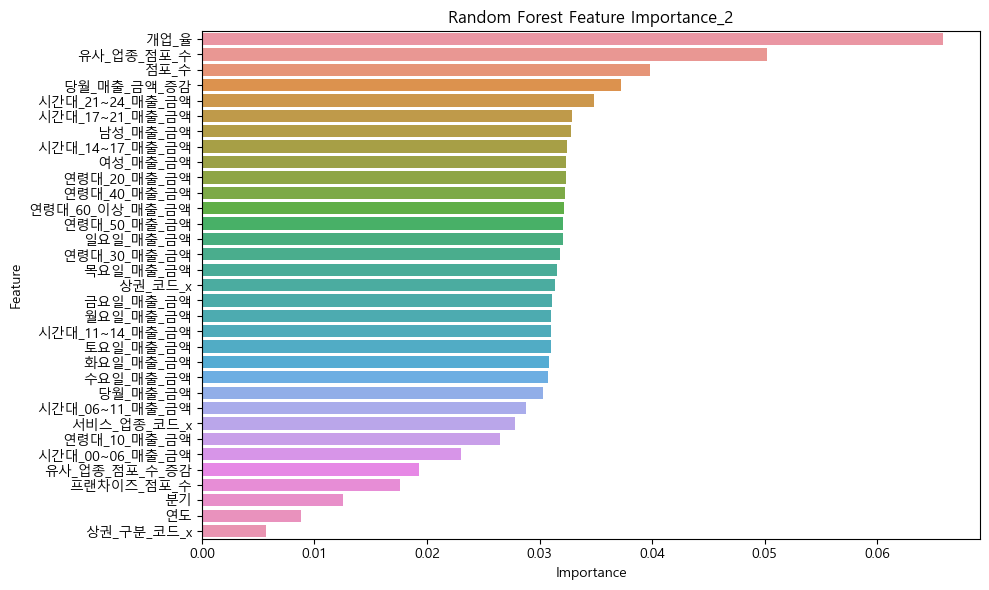

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['axes.unicode_minus'] = False

importances = model1.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Random Forest Feature Importance_2")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [70]:
import lightgbm as lgb

model2 = lgb.LGBMClassifier()
model2.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 48433, number of negative: 194887
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7117
[LightGBM] [Info] Number of data points in the train set: 243320, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199051 -> initscore=-1.392239
[LightGBM] [Info] Start training from score -1.392239


LGBMClassifier()

In [71]:
y_pred = model2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.8083848233249662
Recall: 0.19074180563542265
F1 Score: 0.2946872778962331


In [72]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Defalut
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
# Train
model3 = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100
)

In [73]:
y_pred_prob = model3.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.8074193859818498
Recall: 0.20310523289246693
F1 Score: 0.3068369385804882
